In [1]:
import pandas as pd

sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk' : ['pria', 'pria','pria','pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


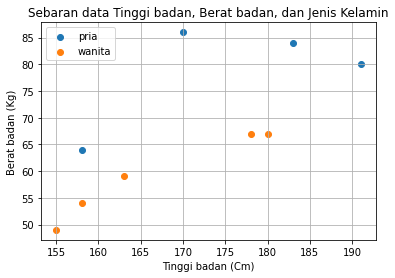

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)
    
plt.legend(loc='upper left')
plt.title('Sebaran data Tinggi badan, Berat badan, dan Jenis Kelamin')
plt.xlabel('Tinggi badan (Cm)')
plt.ylabel('Berat badan (Kg)')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n {X_train} \n')
print(f'y_train: {y_train}')

X_train:
 [[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]] 

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: \n {y_train}')

y_train: 
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [6]:
y_train = y_train.flatten()
print(f'y_train: \n {y_train}')

y_train: 
 [0 0 0 0 1 1 1 1 1]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
tinggi_badan = 155 
berat_badan = 70
X_new = np.array([tinggi_badan,berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [10]:
y_new = model.predict(X_new)
y_new

array([1])

In [11]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

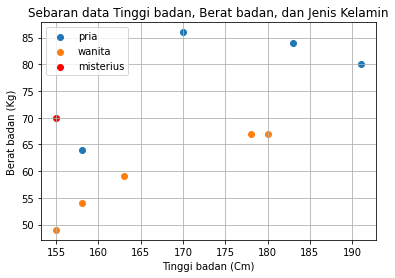

In [12]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'],label=jk)
    
plt.scatter(tinggi_badan, berat_badan, marker='o', color='red',label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran data Tinggi badan, Berat badan, dan Jenis Kelamin')
plt.xlabel('Tinggi badan (Cm)')
plt.ylabel('Berat badan (Kg)')
plt.grid(True)
plt.show()

In [14]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [15]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [21]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius,d) for d in X_train ] 
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [19]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [23]:
# testing set

X_test = np.array([[168,65], [180,96], [160,52], [169,67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print(f'X_test: \n {X_test}')
print(f'y_test: \n {y_test}')

X_test: 
 [[168  65]
 [180  96]
 [160  52]
 [169  67]]
y_test: 
 [0 0 1 1]


In [24]:
# prediksi terhadap testing set

y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accurcy : {acc}')

Accurcy : 0.75


In [26]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print(f'Precision : {prec}')

Accurcy : 0.6666666666666666


In [27]:
from sklearn.metrics import recall_score

reca = recall_score(y_test, y_pred)
print(f'Recall : {reca}')

Recall : 1.0


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 score : {f1}')

F1 score : 0.8


In [31]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(f'Classification Report: \n {cls_report}')

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [34]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test,y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


In [ ]:
classification berdasarkan tetangga terdekat dari cartesius

decision = sex
feature/variabel = tinggi, berat

decision = ?
feature/variabel = tinggi, berat

from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius,d) for d in X_train ] 
data_jarak
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])




1/5 = x/10
x = ?




kalkulasi distance
dstance = sqrr((t1-t2)^2 + (b1-b2)^2  )


gambaran 2D matrix prediksi benar (hanya ada benar dan salah / 1 dan 0 / ya dan tidak)    (binary)
kalau klasifikasi harga sangat mahal, mahal, medium, murah, sangat murah itu              ga bisa/ada cara lain seperti stretch




accuracy
dari testing set, berapa persen terprediksi benar?

accuracy = (TP + TN)/(TP + TN + FP + FN)



precision
dari testing set yg hasilnya harusnya positif, berapa persen terprediksi benar?

precision = TP/(TP + FP)


recall
jika dibandingkan dengan blablabla

recall = TP/(TP + FN)


f1 score
nilai rata2 harmonic antara Precision dan Recall
harmonic = nilai f1 < 1

f1 = 2 * ((Precision x Recall) / (Precision + Recall))


f1 alternatif:
MCC (Matthews Correlation Coefficient)
harmonic dari semuanya malah

MCC = ((TP * TN) + (FP * FN) / sqr((TP + FP) * (TP + FN) * (TN + FP) * (TN * FN))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

round(np.sqrt(X_train.shape[0]))
model_KNN = KNeighborsClassifier(n_neighbors=25)
#training data
model_KNN.fit(X_train, y_train)
y_pred_knn = model_KNN.predict(X_test)


In [ ]:
Parameters
    n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

    weights{‘uniform’, ‘distance’} or callable, default=’uniform’
weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

    algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
Algorithm used to compute the nearest neighbors:

‘ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

    leaf_sizeint, default=30
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

    pint, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

    metricstr or callable, default=’minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of DistanceMetric for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

    metric_paramsdict, default=None
Additional keyword arguments for the metric function.

    n_jobsint, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.